<a href="https://colab.research.google.com/github/gimoralesg/AlgorithmsUN2021II/blob/main/Lab11/HeapSortDistribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heap sort CLRS

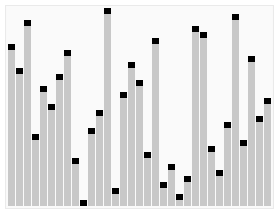



```python
HEAPSORT(A)
1 BUILD-MAX-HEAP(A)
2   for i = A.length downto 2
3      exchange A[1] with A[i]
4      A.heap-size = A.heap-size - 1
5      MAX-HEAPIFY(A,1)

BUILD-MAX-HEAP(A)
1  A.heap-size = A.length
2  for i = ⌊A.length/2⌋ downto 1
3  MAX-HEAPIFY(A,i)

MAX-HEAPIFY(A,i)
1  l = LEFT(i)
2  r = RIGHT(i)
3  if l <= A.heap-size and A[l] > A[i]
4    largest = l
5  else largest = i
6  if r <= A.heap-size and A[r] > A[largest]
7    largest = r
8  if largest != i
9    exchange A[i] with A[largest]
10   MAX-HEAPIFY(A,largest)

```



# Heaps CLRS


Taken from: **_T. H. Cormen, C. E. Leiserson, R. L. Rivest, and C. Stein, Introduction to Algorithms, 3rd ed. London, England: MIT Press, 2009._**

heap data structure is an array object that we can view as a nearly complete binary tree Each node of the tree corresponds to an element of the array. The tree is completely filled on all levels except possibly the lowest, which is filled from the left up to a point. The root of the tree is A[1], and given the index i of a node, we can easily compute the indices of its parent, left child, and right child:

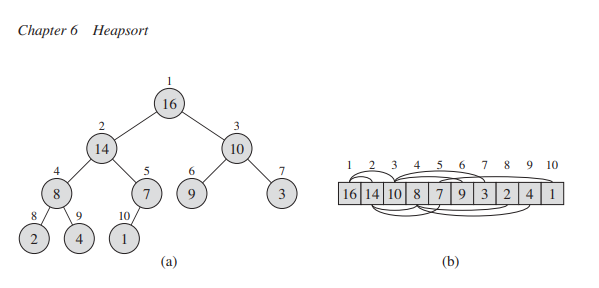

####**PARENT(i)**
```
1 return ⌊i/2⌋
```
####**LEFT(i)**
```
1 return 2 * i
```
####**RIGHT(i)**
```
1 return 2 * i + 1
```


Viewing a heap as a tree, we define the height of a node in a heap to be the
number of edges on the longest simple downward path from the node to a leaf, and
we define the height of the heap to be the height of its root. Since a heap of n elements is based on a complete binary tree, its height is: 
$$\Theta(lg \; n)$$


We see that basic operations on heaps run in time at most proportional
to the height of the tree so this takes:
$$ O(lg \; n) $$

### **MAX HEAPIFY RUNNING TIME**

The running time of MAX HEAPIFY on a subtree of size n rooted at a given
node i is the $\Theta(1)$, time to fix up the relationships among the elements $A[i]$, $A[left(i)]$, and $A[right(i)].$
The children’s subtrees each have size at most 2n/3. The worst case occurs when
the bottom level of the tree is exactly half full—and therefore we can describe the running time of MAX HEAPIFY by the recurrence:
$$T(n) \leq  T(2n/3) + \Theta(1)$$
The solution to this recurrence is:
$$ T(n) = O(lg \; n)$$

## **Building a heap**

We can compute a simple upper bound on the running time of BUILD MAXHEAP as follows. Each call to MAX HEAPIFY costs $O(lg \; n)$ time, and BUILDMAX HEAP makes $O(n)$ such calls. Thus, the running time is $O(n \; lg \; n)$.

The time required by MAX HEAPIFY when called on a node of height h is $O(h)$,
and so we can express the total cost of BUILDMAX HEAP as being bounded from
above by
$$\sum_{h=0}^{\lfloor lg \; n ⌋} ⌈ \frac{n}{2^{h+1}} ⌉ O(h) = O(n\sum_{h=0}^{\lfloor lg \; n ⌋} \frac{h}{2^h})  $$

We evalaute the last summation by substituting x = 1/2 in the formula, yielding

$$\sum_{h=0}^{∞} \frac{h}{2^h} = \frac{1/2}{(1-1/2)^2}$$

Thus, we can bound the running time of BUILDMAX HEAP as:
$$O(n\sum_{h=0}^{\lfloor lg \; n ⌋} \frac{h}{2^h})  = O(\sum_{h=0}^{∞} \frac{h}{2^h})$$

$$=O(n)$$

Hence, we can build a max-heap from an unordered array in linear time

## **Heapsort Algorithm time**

The Heapsort algorithm takes time $O(n \; lg \; n)$, since the call to BUILDMAX HEAP takes time $O(n) and each of the $n - 1$ calls to MAX HEAPIFY takes
time O(lg \; n)

# Experimental analysis of the Heap Sort execution time 

In [ ]:
#from: https://www.geeksforgeeks.org/python-program-for-heap-sort/

def heapify(arr, n, i):
    largest = i  # Initialize largest as root
    l = 2 * i + 1     # left = 2*i + 1
    r = 2 * i + 2     # right = 2*i + 2
  
    # See if left child of root exists and is
    # greater than root
    if l < n and arr[i] < arr[l]:
        largest = l
  
    # See if right child of root exists and is
    # greater than root
    if r < n and arr[largest] < arr[r]:
        largest = r
  
    # Change root, if needed
    if largest != i:
        arr[i],arr[largest] = arr[largest],arr[i]  # swap
  
        # Heapify the root.
        heapify(arr, n, largest)
  
# The main function to sort an array of given size
def heapSort(arr):
    n = len(arr)
  
    # Build a maxheap.
    # Since last parent will be at ((n//2)-1) we can start at that location.
    for i in range(n // 2 - 1, -1, -1):
        heapify(arr, n, i)
  
    # One by one extract elements
    for i in range(n-1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]   # swap
        heapify(arr, i, 0)
        
    return(arr)

In [ ]:
A = [1,2,3,4,5,6,7,8]
heapSort(A)
print(A)

A = [6,7,2,5,4,3,8,1]
heapSort(A)
print(A)

A = [8,7,6,5,4,3,2,1]
heapSort(A)
print(A)

[1, 2, 3, 4, 5, 6, 7, 8]
[1, 2, 3, 4, 5, 6, 7, 8]
[1, 2, 3, 4, 5, 6, 7, 8]


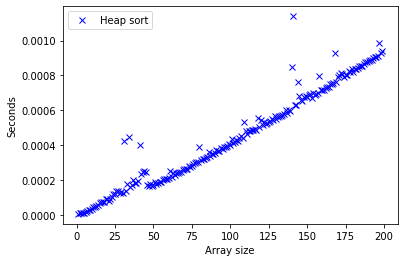

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time 

sizes = np.arange(1,200,1)
results_insertion = []
for i in sizes:
    list1 = list(range(i))
    tic = time.time() 
    heapSort(list1)
    toc = time.time() 
    timesum = toc - tic
    results_insertion.append(timesum) 
plt.plot(sizes, results_insertion, 'bx', label = 'Heap sort')
plt.xlabel('Array size')
plt.ylabel('Seconds')
plt.legend(loc = 'upper left')

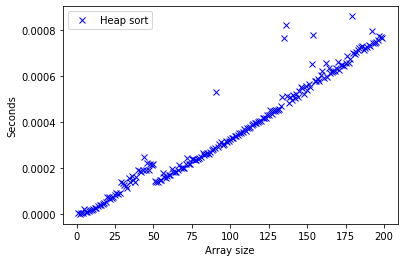

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time 

sizes = np.arange(1,200,1)
results_insertion = []
for i in sizes:
    list1 = list(range(i,1,-1))
    tic = time.time() 
    heapSort(list1)
    toc = time.time() 
    timesum = toc - tic
    results_insertion.append(timesum) 
plt.plot(sizes, results_insertion, 'bx', label = 'Heap sort')
plt.xlabel('Array size')
plt.ylabel('Seconds')
plt.legend(loc = 'upper left')

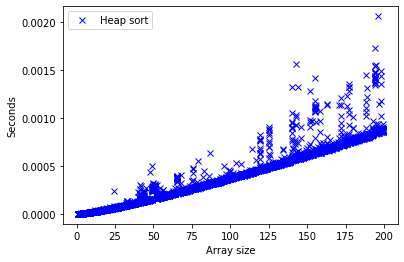

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time 
import random as rnd

sizes = np.arange(1,200,1)
results_insertion = []
sizes_insertion = []
for i in sizes:
  for j in range(20):
    list1 = list(range(i))
    rnd.shuffle(list1)
    tic = time.time() 
    heapSort(list1)
    toc = time.time() 
    timesum = toc - tic
    results_insertion.append(timesum) 
    sizes_insertion.append(i) 
plt.plot(sizes_insertion, results_insertion, 'bx', label = 'Heap sort')
plt.xlabel('Array size')
plt.ylabel('Seconds')
plt.legend(loc = 'upper left')

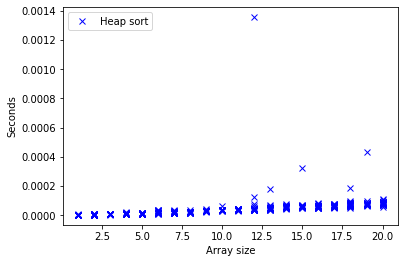

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time 
import random as rnd

sizes = np.arange(1,21,1)
results_insertion = []
sizes_insertion = []
for i in sizes:

  list1 = list(range(i))
  tic = time.time() 
  heapSort(list1)
  toc = time.time() 
  timesum = toc - tic
  results_insertion.append(timesum) 
  sizes_insertion.append(i) 
  
  list1 = list(range(i,1,-1))
  tic = time.time() 
  heapSort(list1)
  toc = time.time() 
  timesum = toc - tic
  results_insertion.append(timesum) 
  sizes_insertion.append(i) 
  
  for j in range(23):
    list1 = list(range(i))
    rnd.shuffle(list1)
    tic = time.time() 
    heapSort(list1)
    toc = time.time() 
    timesum = toc - tic
    results_insertion.append(timesum) 
    sizes_insertion.append(i) 

plt.plot(sizes_insertion, results_insertion, 'bx', label = 'Heap sort')
plt.xlabel('Array size')
plt.ylabel('Seconds')
plt.legend(loc = 'upper left')

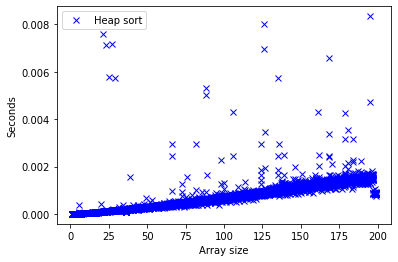

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time 
import random as rnd

sizes = np.arange(1,200,1)
results_insertion = []
sizes_insertion = []
for i in sizes:

  list1 = list(range(i))
  tic = time.time() 
  heapSort(list1)
  toc = time.time() 
  timesum = toc - tic
  results_insertion.append(timesum) 
  sizes_insertion.append(i) 
  
  list1 = list(range(i,1,-1))
  tic = time.time() 
  heapSort(list1)
  toc = time.time() 
  timesum = toc - tic
  results_insertion.append(timesum) 
  sizes_insertion.append(i) 
  
  for j in range(20):
    list1 = list(range(i))
    rnd.shuffle(list1)
    tic = time.time() 
    heapSort(list1)
    toc = time.time() 
    timesum = toc - tic
    results_insertion.append(timesum) 
    sizes_insertion.append(i) 

plt.plot(sizes_insertion, results_insertion, 'bx', label = 'Heap sort')
plt.xlabel('Array size')
plt.ylabel('Seconds')
plt.legend(loc = 'upper left')

# Heap sort  time complexity histograms for permutations of $n$ different elements counting steps like CLRS I.2.1 


 

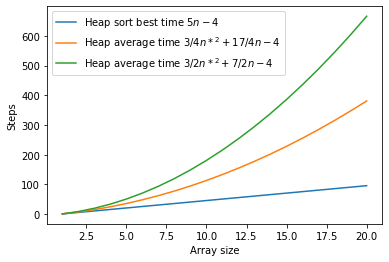

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

n = np.arange(1,21,1)

plt.plot(n, 5*n-4,  label = 'Heap sort best time $5n-4$')
plt.plot(n, 3/4*n**2+17/4*n-4, label = 'Heap average time $3/4 n*^2+17/4 n - 4$')
plt.plot(n, 3/2*n**2+7/2*n-4, label = 'Heap average time $3/2 n*^2+7/2 n - 4$')
plt.xlabel('Array size')
plt.ylabel('Steps')
plt.legend(loc = 'upper left')

In [33]:
def heapify_steps(arr, n, i,steps):
    largest = i # +1  
    l = 2 * i + 1  # +1   
    r = 2 * i + 2  # +1  
    steps += 3 
    
    if l < n and arr[i] < arr[l]:
        largest = l #1
        steps += 1
   
    if r < n and arr[largest] < arr[r]:
        largest = r #1
        steps += 1
    
    if largest != i:
        arr[i],arr[largest] = arr[largest],arr[i]  
        steps += heapify_steps(arr, n, largest, steps) + 1 
    return(steps)

def heapSort_steps(arr):
    steps = 0
    n = len(arr)
  
    for i in range(n // 2 - 1, -1, -1):
        steps += heapify_steps(arr, n, i, steps) 
  
    for i in range(n-1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]
        steps += heapify_steps(arr, i, 0, steps)
        
    return(steps)

In [ ]:
A = [1,2,3,4,5,6,7,8]
print(heapSort_steps(A))
print(A)

A = [6,7,2,5,4,3,8,1]
print(heapSort_steps(A))
print(A)

A = [8,7,6,5,4,3,2,1]
print(heapSort_steps(A))
print(A)

3234297
[1, 2, 3, 4, 5, 6, 7, 8]
585741
[1, 2, 3, 4, 5, 6, 7, 8]
184845
[1, 2, 3, 4, 5, 6, 7, 8]


In [ ]:
from itertools import permutations
 
n = 3
perm = permutations(range(1,n+1))

ls =  [] 
# Print the obtained permutations
for i in list(perm):
   print(i)

(1, 2, 3)
(1, 3, 2)
(2, 1, 3)
(2, 3, 1)
(3, 1, 2)
(3, 2, 1)


Generate all permutations without repetitions of size *n* (for small *n*), plot the "exact" time  distribution (number of steps), and print the media and the standar deviation

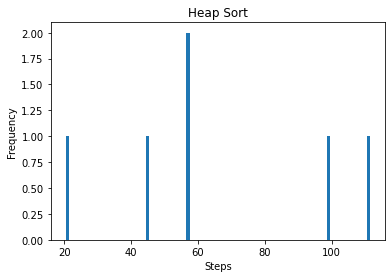

n 3
number of permutations n! = 6
exp min = 21
min formula 5*n-4 = 11
exp max = 111
max formula 3/2*n**2+7/2*n-4 = 20.0
exp mean = 65.0
mean formula 3/4*n**2+17/4*n-4 = 15.5
stdev 30.919249667480614


In [ ]:
from itertools import permutations
import matplotlib.pyplot as plt
import numpy as np
import math

n=3
X = range(n)
times = []

for P in permutations(X):
  t = heapSort_steps(list(P)) 
  times.append(t)  
b = np.array(range(min(times)-1, max(times)+1))+0.5
plt.hist(times, bins = b )
plt.title("Heap Sort")
plt.xlabel("Steps")
plt.ylabel("Frequency")
plt.show()
    
print("n",n)
print("number of permutations n! =",math.factorial(n)) 
print("exp min =",min(times))
print("min formula 5*n-4 =",5*n-4)
print("exp max =",max(times))
print("max formula 3/2*n**2+7/2*n-4 =",3/2*n**2+7/2*n-4)
print("exp mean =",np.mean(times))
print("mean formula 3/4*n**2+17/4*n-4 =",3/4*n**2+17/4*n-4)
print("stdev",np.std(times))

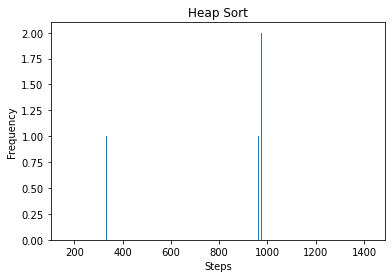

n 4
number of permutations n! = 24
exp min = 165
min formula 5*n-4 = 16
exp max = 1425
max formula 3/2*n**2+7/2*n-4 = 34.0
exp mean = 662.0
mean formula 3/4*n**2+17/4*n-4 = 25.0
stdev 333.39916016690864


In [ ]:
from itertools import permutations
import matplotlib.pyplot as plt
import numpy as np
import math

n=4
X = range(n)
times = []

for P in permutations(X):
  t = heapSort_steps(list(P)) 
  times.append(t)  

b = np.array(range(min(times)-1, max(times)+1))+0.5
plt.hist(times, bins = b )
plt.title("Heap Sort")
plt.xlabel("Steps")
plt.ylabel("Frequency")
plt.show()
    
print("n",n)
print("number of permutations n! =",math.factorial(n)) 
print("exp min =",min(times))
print("min formula 5*n-4 =",5*n-4)
print("exp max =",max(times))
print("max formula 3/2*n**2+7/2*n-4 =",3/2*n**2+7/2*n-4)
print("exp mean =",np.mean(times))
print("mean formula 3/4*n**2+17/4*n-4 =",3/4*n**2+17/4*n-4)
print("stdev",np.std(times))

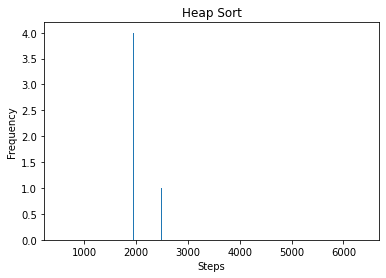

n 5
number of permutations n! = 120
exp min = 525
min formula 5*n-4 = 21
exp max = 6393
max formula 3/2*n**2+7/2*n-4 = 51.0
exp mean = 2804.7
mean formula 3/4*n**2+17/4*n-4 = 36.0
stdev 1395.7010818939707


In [ ]:
from itertools import permutations
import matplotlib.pyplot as plt
import numpy as np
import math

n=5
X = range(n)
times = []

for P in permutations(X):
  t = heapSort_steps(list(P)) 
  times.append(t)  

b = np.array(range(min(times)-1, max(times)+1))+0.5
plt.hist(times, bins = b )
plt.title("Heap Sort")
plt.xlabel("Steps")
plt.ylabel("Frequency")
plt.show()
    
print("n",n)
print("number of permutations n! =",math.factorial(n)) 
print("exp min =",min(times))
print("min formula 5*n-4 =",5*n-4)
print("exp max =",max(times))
print("max formula 3/2*n**2+7/2*n-4 =",3/2*n**2+7/2*n-4)
print("exp mean =",np.mean(times))
print("mean formula 3/4*n**2+17/4*n-4 =",3/4*n**2+17/4*n-4)
print("stdev",np.std(times))

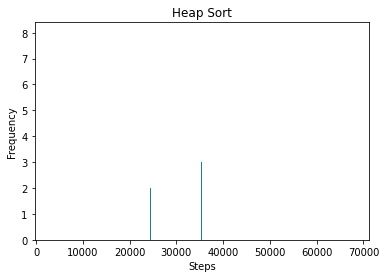

n 6
number of permutations n! = 720
exp min = 2925
min formula 5*n-4 = 26
exp max = 68025
max formula 3/2*n**2+7/2*n-4 = 71.0
exp mean = 22242.916666666668
mean formula 3/4*n**2+17/4*n-4 = 48.5
stdev 12794.465184591429


In [ ]:
from itertools import permutations
import matplotlib.pyplot as plt
import numpy as np
import math

n=6
X = range(n)
times = []

for P in permutations(X):
  t = heapSort_steps(list(P)) 
  times.append(t)  

b = np.array(range(min(times)-1, max(times)+1))+0.5
plt.hist(times, bins = b )
plt.title("Heap Sort")
plt.xlabel("Steps")
plt.ylabel("Frequency")
plt.show()
    
print("n",n)
print("number of permutations n! =",math.factorial(n)) 
print("exp min =",min(times))
print("min formula 5*n-4 =",5*n-4)
print("exp max =",max(times))
print("max formula 3/2*n**2+7/2*n-4 =",3/2*n**2+7/2*n-4)
print("exp mean =",np.mean(times))
print("mean formula 3/4*n**2+17/4*n-4 =",3/4*n**2+17/4*n-4)
print("stdev",np.std(times))

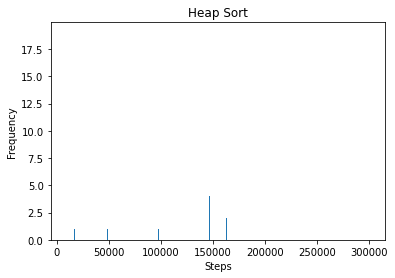

n 7
number of permutations n! = 5040
exp min = 8757
min formula 5*n-4 = 31
exp max = 300729
max formula 3/2*n**2+7/2*n-4 = 94.0
exp mean = 92843.87261904762
mean formula 3/4*n**2+17/4*n-4 = 62.5
stdev 52100.766937303364


In [ ]:
from itertools import permutations
import matplotlib.pyplot as plt
import numpy as np
import math

n=7
X = range(n)
times = []

for P in permutations(X):
  t = heapSort_steps(list(P)) 
  times.append(t)  

b = np.array(range(min(times)-1, max(times)+1))+0.5
plt.hist(times, bins = b )
plt.title("Heap Sort")
plt.xlabel("Steps")
plt.ylabel("Frequency")
plt.show()
    
print("n",n)
print("number of permutations n! =",math.factorial(n)) 
print("exp min =",min(times))
print("min formula 5*n-4 =",5*n-4)
print("exp max =",max(times))
print("max formula 3/2*n**2+7/2*n-4 =",3/2*n**2+7/2*n-4)
print("exp mean =",np.mean(times))
print("mean formula 3/4*n**2+17/4*n-4 =",3/4*n**2+17/4*n-4)
print("stdev",np.std(times))

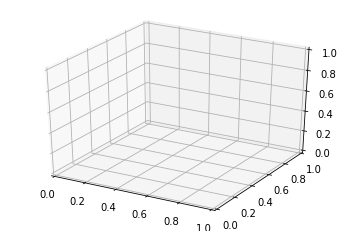

In [ ]:
# https://towardsdatascience.com/an-easy-introduction-to-3d-plotting-with-matplotlib-801561999725

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection="3d")

plt.show()

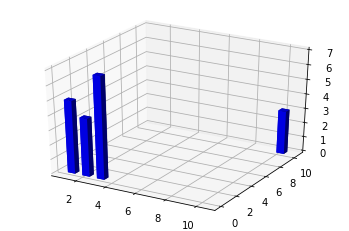

In [ ]:
# https://stackoverflow.com/questions/24736758/parameters-required-by-bar3d-with-python

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = plt.axes(projection="3d")

x = [1, 2, 3, 10]  # x coordinates of each bar
y = [0, 0, 0, 10] # y coordinates of each bar
z = [0, 0, 0, 0]  # z coordinates of each bar
dx = [0.5, 0.5, 0.5, 0.5]  # Width of each bar
dy = [0.5, 0.5, 0.5, 0.5]  # Depth of each bar
dz = [5, 4, 7, 3]        # Height of each bar

ax.bar3d(x, y, z, dx, dy, dz, color='b', zsort='average')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


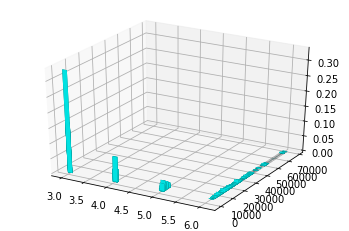

In [36]:
# https://towardsdatascience.com/an-easy-introduction-to-3d-plotting-with-matplotlib-801561999725
from itertools import permutations
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random 

fig = plt.figure()
ax = plt.axes(projection="3d")

N = 6

x = []
y = []
z = []
dx = []
dy = []
dz = []

for n in np.arange(3,N+1,1):
   A = range(n)
   times = []

   for P in permutations(A):
       t = heapSort_steps(list(P)) 
       times.append(t)  

   b = np.array(range(min(times)-1, max(times)+1))+0.5
   H = np.array(np.histogram(times,b))
   H[0] = H[0]/np.sum(H[0])
   for i in range(len(H[0])):
     x.append(n)
     y.append(H[1][i])
     z.append(0)
     dx.append(0.1)
     dy.append(0.1)
     dz.append(H[0][i])

ax.bar3d(x, y, z, dx, dy, dz, color='aqua', zsort='average')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


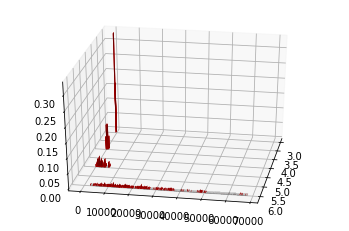

In [38]:
# https://towardsdatascience.com/an-easy-introduction-to-3d-plotting-with-matplotlib-801561999725
from itertools import permutations
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random 

fig = plt.figure()
ax = plt.axes(projection="3d")

N = 6

x = []
y = []
z = []
dx = []
dy = []
dz = []

for n in np.arange(3,N+1,1):
   A = range(n)
   times = []

   for P in permutations(A):
       t = heapSort_steps(list(P)) 
       times.append(t)  

   b = np.array(range(min(times)-1, max(times)+1))+0.5
   H = np.array(np.histogram(times,b))
   H[0] = H[0]/np.sum(H[0])
   for i in range(len(H[0])):
     x.append(n)
     y.append(H[1][i])
     z.append(0)
     dx.append(0.1)
     dy.append(0.1)
     dz.append(H[0][i])

ax.view_init(30, 10)
ax.bar3d(x, y, z, dx, dy, dz, color='red', zsort='average')
plt.show()


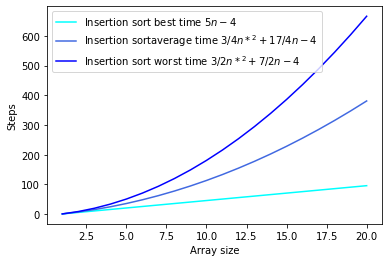

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

n = np.arange(1,21,1)

plt.plot(n, 5*n-4,  label = 'Insertion sort best time $5n-4$', color='aqua')
plt.plot(n, 3/4*n**2+17/4*n-4, label = 'Insertion sortaverage time $3/4 n*^2+17/4 n - 4$', color='royalblue')
plt.plot(n, 3/2*n**2+7/2*n-4, label = 'Insertion sort worst time $3/2 n*^2+7/2 n - 4$',color='blue')
plt.xlabel('Array size')
plt.ylabel('Steps')
plt.legend(loc = 'upper left')

# Sample of runs (montecarlo)
Generate a sample of *runs=1000,10000* random permutations of size *n=3,4,30,100* (for large *n*), plot the "approximated o estimated" time  distribution (number of steps), and print the media and the standar deviation.

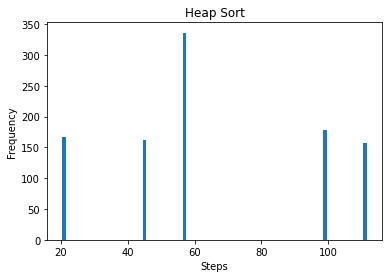

n 3
runs 1000
min 21
min formula ,5*n-4 = 11
max 111
max formula 3/2*n**2+7/2*n-4 = 20.0
mean 64.998
mean formula 3/4*n**2+17/4*n-4 =  15.5
stdev 30.783047217583903


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

n=3
runs=1000
times = []
for r in range(1,runs+1): 
  P= np.random.permutation(n)
  t = heapSort_steps(P) 
  times.append(t)  

b = np.array(range(min(times)-1, max(times)+1))+0.5
plt.hist(times, bins = b )  
plt.title("Heap Sort")
plt.xlabel("Steps")
plt.ylabel("Frequency")
plt.show()
    
print("n",n)
print("runs",runs)
print("min",min(times))
print("min formula ,5*n-4 =",5*n-4)
print("max",max(times))
print("max formula 3/2*n**2+7/2*n-4 =",3/2*n**2+7/2*n-4)
print("mean",np.mean(times))
print("mean formula 3/4*n**2+17/4*n-4 = ",3/4*n**2+17/4*n-4)
print("stdev",np.std(times))

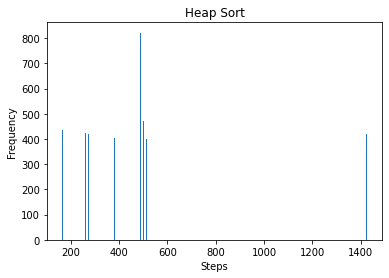

n 4
runs 10000
min 165
min formula ,5*n-4 = 16
max 1425
max formula 3/2*n**2+7/2*n-4 = 34.0
mean 657.9102
mean formula 3/4*n**2+17/4*n-4 =  25.0
stdev 332.67147508609753


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

n=4
runs=10000
times = []
for r in range(1,runs+1): 
  P= np.random.permutation(n)
  t = heapSort_steps(P) 
  times.append(t)  

b = np.array(range(min(times)-1, max(times)+1))+0.5
plt.hist(times, bins = b )  
plt.title("Heap Sort")
plt.xlabel("Steps")
plt.ylabel("Frequency")
plt.show()
    
print("n",n)
print("runs",runs)
print("min",min(times))
print("min formula ,5*n-4 =",5*n-4)
print("max",max(times))
print("max formula 3/2*n**2+7/2*n-4 =",3/2*n**2+7/2*n-4)
print("mean",np.mean(times))
print("mean formula 3/4*n**2+17/4*n-4 = ",3/4*n**2+17/4*n-4)
print("stdev",np.std(times))

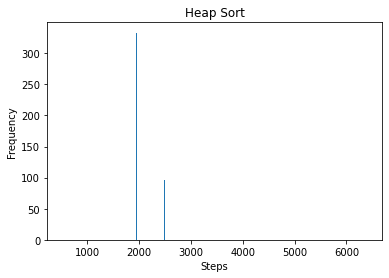

n 5
runs 10000
min 525
min formula ,5*n-4 = 21
max 6393
max formula 3/2*n**2+7/2*n-4 = 51.0
mean 2802.9744
mean formula 3/4*n**2+17/4*n-4 =  36.0
stdev 1405.2264185335544


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

n=5
runs=10000
times = []
for r in range(1,runs+1): 
  P= np.random.permutation(n)
  t = heapSort_steps(P) 
  times.append(t)  

b = np.array(range(min(times)-1, max(times)+1))+0.5
plt.hist(times, bins = b )  
plt.title("Heap Sort")
plt.xlabel("Steps")
plt.ylabel("Frequency")
plt.show()
    
print("n",n)
print("runs",runs)
print("min",min(times))
print("min formula ,5*n-4 =",5*n-4)
print("max",max(times))
print("max formula 3/2*n**2+7/2*n-4 =",3/2*n**2+7/2*n-4)
print("mean",np.mean(times))
print("mean formula 3/4*n**2+17/4*n-4 = ",3/4*n**2+17/4*n-4)
print("stdev",np.std(times))

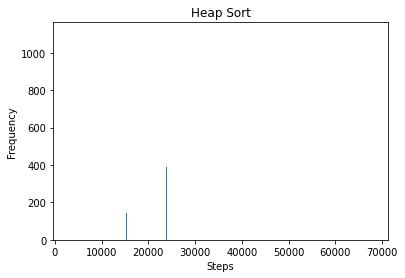

n 6
runs 100000
min 2925
min formula ,5*n-4 = 26
max 68025
max formula 3/2*n**2+7/2*n-4 = 71.0
mean 22207.15284
mean formula 3/4*n**2+17/4*n-4 =  48.5
stdev 12827.423266813954


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

n=6
runs=100000
times = []
for r in range(1,runs+1): 
  P= np.random.permutation(n)
  t = heapSort_steps(P) 
  times.append(t)  

b = np.array(range(min(times)-1, max(times)+1))+0.5
plt.hist(times, bins = b )  
plt.title("Heap Sort")
plt.xlabel("Steps")
plt.ylabel("Frequency")
plt.show()
    
print("n",n)
print("runs",runs)
print("min",min(times))
print("min formula ,5*n-4 =",5*n-4)
print("max",max(times))
print("max formula 3/2*n**2+7/2*n-4 =",3/2*n**2+7/2*n-4)
print("mean",np.mean(times))
print("mean formula 3/4*n**2+17/4*n-4 = ",3/4*n**2+17/4*n-4)
print("stdev",np.std(times))

# Heap sort  time complexity histograms for permutations of $n$ elements with repetitions counting steps like CLRS I.2.1 

In [ ]:
from itertools import product

n=3 
perm = product(range(1,n+1), repeat = n)

c=0
for i in perm:
    print(i)
    c+=1

print(c)

(1, 1, 1)
(1, 1, 2)
(1, 1, 3)
(1, 2, 1)
(1, 2, 2)
(1, 2, 3)
(1, 3, 1)
(1, 3, 2)
(1, 3, 3)
(2, 1, 1)
(2, 1, 2)
(2, 1, 3)
(2, 2, 1)
(2, 2, 2)
(2, 2, 3)
(2, 3, 1)
(2, 3, 2)
(2, 3, 3)
(3, 1, 1)
(3, 1, 2)
(3, 1, 3)
(3, 2, 1)
(3, 2, 2)
(3, 2, 3)
(3, 3, 1)
(3, 3, 2)
(3, 3, 3)
27


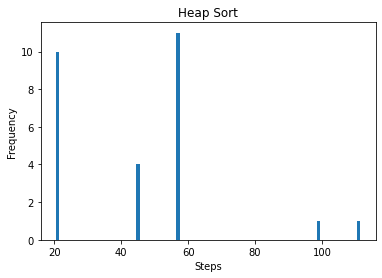

n 3
number of permutations with repetion = 27
exp min = 21
min formula 5*n-4 = 11
exp max = 111
max formula 3/2*n**2+7/2*n-4 = 20.0
exp mean = 45.44444444444444
mean formula 3/4*n**2+17/4*n-4 = 15.5
stdev 23.26232581813641


In [ ]:
from itertools import product
import matplotlib.pyplot as plt
import numpy as np 

n = 3
 
times = []
for P in product(range(1,n+1), repeat = n):
  t = heapSort_steps(list(P)) 
  times.append(t)  

b = np.array(range(min(times)-1, max(times)+1))+0.5
plt.hist(times, bins = b )
plt.title("Heap Sort")
plt.xlabel("Steps")
plt.ylabel("Frequency")
plt.show()
    
print("n",n)
print("number of permutations with repetion =",n**n) 
print("exp min =",min(times))
print("min formula 5*n-4 =",5*n-4)
print("exp max =",max(times))
print("max formula 3/2*n**2+7/2*n-4 =",3/2*n**2+7/2*n-4)
print("exp mean =",np.mean(times))
print("mean formula 3/4*n**2+17/4*n-4 =",3/4*n**2+17/4*n-4)
print("stdev",np.std(times))

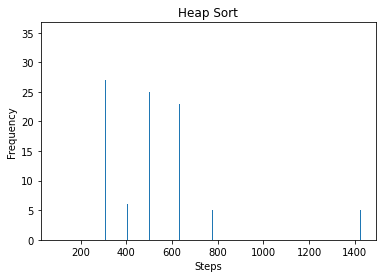

n 4
number of permutations with repetion = 256
exp min = 93
min formula 5*n-4 = 16
exp max = 1425
max formula 3/2*n**2+7/2*n-4 = 34.0
exp mean = 440.4375
mean formula 3/4*n**2+7/2*n-13/4 = 22.75
stdev 275.5251732487433


In [ ]:
from itertools import product
import matplotlib.pyplot as plt
import numpy as np 

n = 4
 
times = []
for P in product(range(1,n+1), repeat = n):
  t = heapSort_steps(list(P)) 
  times.append(t)  

b = np.array(range(min(times)-1, max(times)+1))+0.5
plt.hist(times, bins = b )
plt.title("Heap Sort")
plt.xlabel("Steps")
plt.ylabel("Frequency")
plt.show()
    
print("n",n)
print("number of permutations with repetion =",n**n) 
print("exp min =",min(times))
print("min formula 5*n-4 =",5*n-4)
print("exp max =",max(times))
print("max formula 3/2*n**2+7/2*n-4 =",3/2*n**2+7/2*n-4)
print("exp mean =",np.mean(times))
print("mean formula 3/4*n**2+7/2*n-13/4 =",3/4*n**2+7/2*n-13/4)
print("stdev",np.std(times))

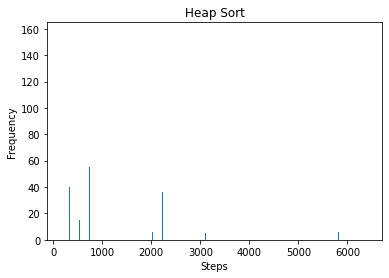

n 5
number of permutations with repetion = 3125
exp min = 189
min formula 5*n-4 = 21
exp max = 6393
max formula 3/2*n**2+7/2*n-4 = 51.0
exp mean = 1793.37888
mean formula 3/4*n**2+7/2*n-13/4 = 33.0
stdev 1125.1066266847536


In [40]:
from itertools import product
import matplotlib.pyplot as plt
import numpy as np 

n = 5
 
times = []
for P in product(range(1,n+1), repeat = n):
  t = heapSort_steps(list(P)) 
  times.append(t)  

b = np.array(range(min(times)-1, max(times)+1))+0.5
plt.hist(times, bins = b )
plt.title("Heap Sort")
plt.xlabel("Steps")
plt.ylabel("Frequency")
plt.show()
    
print("n",n)
print("number of permutations with repetion =",n**n) 
print("exp min =",min(times))
print("min formula 5*n-4 =",5*n-4)
print("exp max =",max(times))
print("max formula 3/2*n**2+7/2*n-4 =",3/2*n**2+7/2*n-4)
print("exp mean =",np.mean(times))
print("mean formula 3/4*n**2+7/2*n-13/4 =",3/4*n**2+7/2*n-13/4)
print("stdev",np.std(times))

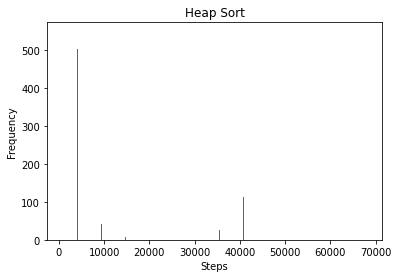

n 6
number of permutations with repetion = 46656
exp min = 765
min formula 5*n-4 = 26
exp max = 68025
max formula 3/2*n**2+7/2*n-4 = 71.0
exp mean = 14024.591306584362
mean formula 3/4*n**2+7/2*n-13/4 = 44.75
stdev 9886.054534333158


In [39]:
from itertools import product
import matplotlib.pyplot as plt
import numpy as np 

n = 6
 
times = []
for P in product(range(1,n+1), repeat = n):
  t = heapSort_steps(list(P)) 
  times.append(t)  

b = np.array(range(min(times)-1, max(times)+1))+0.5
plt.hist(times, bins = b )
plt.title("Heap Sort")
plt.xlabel("Steps")
plt.ylabel("Frequency")
plt.show()
    
print("n",n)
print("number of permutations with repetion =",n**n) 
print("exp min =",min(times))
print("min formula 5*n-4 =",5*n-4)
print("exp max =",max(times))
print("max formula 3/2*n**2+7/2*n-4 =",3/2*n**2+7/2*n-4)
print("exp mean =",np.mean(times))
print("mean formula 3/4*n**2+7/2*n-13/4 =",3/4*n**2+7/2*n-13/4)
print("stdev",np.std(times))

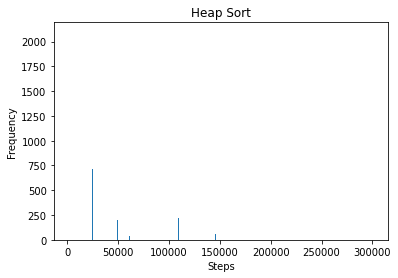

n 7
number of permutations with repetion = 823543
exp min = 1533
min formula 5*n-4 = 31
exp max = 300729
max formula 3/2*n**2+7/2*n-4 = 94.0
exp mean = 56431.22455172347
mean formula 3/4*n**2+7/2*n-13/4 = 58.0
stdev 40367.059931279844


In [ ]:
from itertools import product
import matplotlib.pyplot as plt
import numpy as np 

n = 7
 
times = []
for P in product(range(1,n+1), repeat = n):
  t = heapSort_steps(list(P)) 
  times.append(t)  

b = np.array(range(min(times)-1, max(times)+1))+0.5
plt.hist(times, bins = b )
plt.title("Heap Sort")
plt.xlabel("Steps")
plt.ylabel("Frequency")
plt.show()
    
print("n",n)
print("number of permutations with repetion =",n**n) 
print("exp min =",min(times))
print("min formula 5*n-4 =",5*n-4)
print("exp max =",max(times))
print("max formula 3/2*n**2+7/2*n-4 =",3/2*n**2+7/2*n-4)
print("exp mean =",np.mean(times))
print("mean formula 3/4*n**2+7/2*n-13/4 =",3/4*n**2+7/2*n-13/4)
print("stdev",np.std(times))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


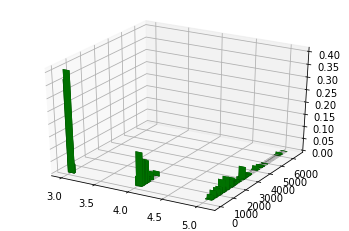

In [ ]:
#sin ejecutar
# https://towardsdatascience.com/an-easy-introduction-to-3d-plotting-with-matplotlib-801561999725
from itertools import product
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random 

fig = plt.figure()
ax = plt.axes(projection="3d")

N = 5

x = []
y = []
z = []
dx = []
dy = []
dz = []

for n in np.arange(3,N+1,1):

   times = []

   for P in product(range(1,n+1), repeat = n):
       t = heapSort_steps(list(P)) 
       times.append(t)  

   b = np.array(range(min(times)-1, max(times)+1))+0.5
   H = np.array(np.histogram(times,b))
   H[0] = H[0]/np.sum(H[0])
   for i in range(len(H[0])):
     x.append(n)
     y.append(H[1][i])
     z.append(0)
     dx.append(0.1)
     dy.append(0.1)
     dz.append(H[0][i])

ax.bar3d(x, y, z, dx, dy, dz, color='green', zsort='average')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


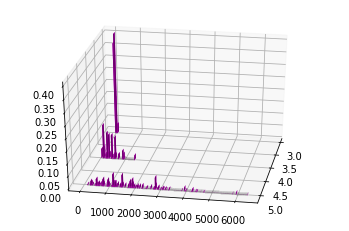

In [ ]:
# https://towardsdatascience.com/an-easy-introduction-to-3d-plotting-with-matplotlib-801561999725
from itertools import product
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random 

fig = plt.figure()
ax = plt.axes(projection="3d")

N = 5

x = []
y = []
z = []
dx = []
dy = []
dz = []

for n in np.arange(3,N+1,1):
  
   times = []

   for P in product(range(1,n+1), repeat = n):
       t = heapSort_steps(list(P)) 
       times.append(t) 

   b = np.array(range(min(times)-1, max(times)+1))+0.5
   H = np.array(np.histogram(times,b))
   H[0] = H[0]/np.sum(H[0])
   for i in range(len(H[0])):
     x.append(n)
     y.append(H[1][i])
     z.append(0)
     dx.append(0.1)
     dy.append(0.1)
     dz.append(H[0][i])

ax.view_init(30, 10)
ax.bar3d(x, y, z, dx, dy, dz, color='magenta', zsort='average')
plt.show()

# Average case - expected number of comparisons + swaps on random unifrom permtation of $n$   elements with repetitions $t_a(n) = \frac{3}{4}n^2 + \frac{7}{2}n  - \frac{13}{4} = \Theta(n^2) $

In [ ]:
# Average case on random uniform permtations with repetitions of  $n$   elements  $t_a(n) = \frac{3}{4}n^2 + \frac{7}{2}n -\frac{13}{4}= \Theta(n^2) $
import numpy as np 
import pandas as pd
import scipy.linalg as la

n = np.array([3.0,4.0,5.0,6.0])    # Number n of sorted elments 
t = np.array([62.0,185.7,648.0,957.75]) # Average comparisons + swaps for the corresponding n 

data = pd.DataFrame({'n': n, 't': t})
data

,n,t
0,3.0,62.00
1,4.0,185.70
2,5.0,648.00
3,6.0,957.75


In [ ]:
X = np.column_stack([n**0,n**1,n**2,n**3])
a = la.solve(X,t)
a

array([ 6634.        , -4908.74166667,  1151.6       ,   -81.85833333])

In [ ]:
# Average case on random uniform permtations with repetitions of  $n$   elements  $t_a(n) = \frac{3}{4}n^2 + \frac{7}{2}n -\frac{13}{4}= \Theta(n^2) $
import numpy as np 
import pandas as pd
import scipy.linalg as la

n = np.array([3.0,4.0,5.0])    # Number n of sorted elments 
t = np.array([62.0,185.7,648.0]) # Average comparisons + swaps for the corresponding n 

data = pd.DataFrame({'n': n, 't': t})
data

,n,t
0,3.0,62.0
1,4.0,185.7
2,5.0,648.0


In [ ]:
X = np.column_stack([n**0,n**1,n**2])
a = la.solve(X,t)
a

array([ 1722.5, -1061.4,   169.3])